# Simulation of Prices of Coupon-Bearing Bonds using CIR

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import edhec_risk_kit as erk

In [3]:
erk.bond_price(5, 100, 0.05, 12, 0.03)

0    109.275393
dtype: float64

In [19]:
rates, zc_prices = erk.cir(10, 500, b=0.03, r_0=0.03)

In [20]:
erk.bond_price(5, 100, 0.05, 12, rates.iloc[0, [1,2,3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [21]:
erk.bond_price(5, 100, 0.05, 12, rates.iloc[1, [1,2,3]])

1    110.357209
2    108.636447
3    107.941340
dtype: float64

In [22]:
rates[[1,2,3]].head()

,1,2,3
0,0.030000,0.030000,0.030000
1,0.027789,0.031317,0.032759
2,0.028641,0.029503,0.033568
3,0.028700,0.030753,0.032639
4,0.028881,0.031826,0.032465


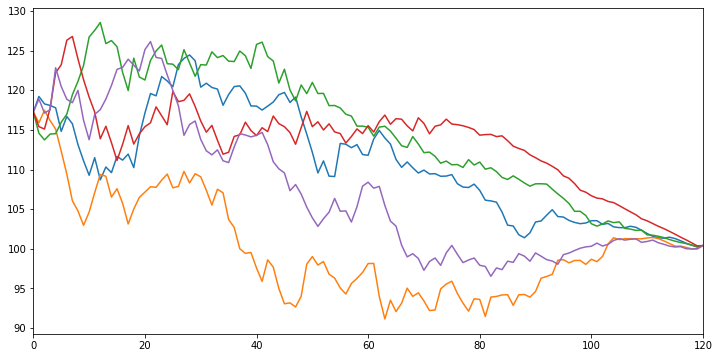

In [24]:
erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4,5]]).plot(legend=False,
                                                          figsize=(12,6))

In [25]:
prices = erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4,5]])
prices

,1,2,3,4,5
0,117.26,117.26,117.26,117.26,117.26
1,119.232,115.909,114.581,115.423,118.902
2,118.285,117.477,113.746,115.114,117.135
3,118.096,116.196,114.482,117.694,117.548
4,117.795,115.105,114.531,122.225,122.848
...,...,...,...,...,...
116,101.021,100.344,100.799,101.472,100.276
117,100.701,100.18,100.663,101.129,100.016
118,100.474,99.997,100.463,100.753,99.9797
119,100.25,99.993,100.231,100.367,100.019


Generate random bond prices so that we can generate returns from this random bond prices, once we have the returns from a bond portfolio we can then construct the returns of a portfolio that consists of a mix of stocks and bonds.

In [27]:
br = prices.pct_change().dropna()
erk.annualize_rets(br, 12)

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

Why are these annualized returns of this bond over this period are negative?

It doesn't make sense since its a bond generating a coupon.

The reason is that this is just the price return of the bond. We are interested in the total return of the bond.

The total return of the bond is the value that we get not just from the price appreciation but also the coupon. 

In [30]:
p = erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4]])
btr = erk.bond_total_return(p, 100, 0.05, 12)
erk.annualize_rets(btr, 12)

1    0.030171
2    0.035096
3    0.028752
4    0.029118
dtype: float64

Let's assume I have a 10 year bond

In [31]:
price_10 = erk.bond_price(10, 100, 0.05, 12, rates)
price_10[[1,2,3]].tail()

,1,2,3
116,101.021,100.344,100.799
117,100.701,100.18,100.663
118,100.474,99.997,100.463
119,100.25,99.993,100.231
120,100.417,100.417,100.417


In [32]:
price_30 = erk.bond_price(30, 100, 0.05, 12, rates)
price_30[[1,2,3]].tail()

,1,2,3
116,151.713,114.536,138.078
117,146.032,109.841,142.951
118,146.66,99.77,145.261
119,149.704,98.9396,144.988
120,149.717,98.3597,150.788


This prices do not converge because there's still 20 years left on the bond maturity for the 30 year bond.

In [34]:
rets_10 = erk.bond_total_return(price_10, 100, 0.05, 12)
rets_30 = erk.bond_total_return(price_30, 100, 0.05, 12)

# assuming we're rebalancing every month
rets_bonds = 0.6*rets_10 + 0.4*rets_30

In [35]:
# every column is a different scenario
mean_rets_bonds = rets_bonds.mean(axis="columns")
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,annualized return,annualized vol,skewness,kurtosis,Cornish-Fisher VaR (5%),historic CVaR (5%),sharpe ratio,max drawdown
0,0.035967,0.003633,0.350122,3.604134,-0.001351,-0.000878,1.598457,0.0


In [36]:
prices_eq = erk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
prices_eq.shape

(121, 500)

In [38]:
rets_eq = prices_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [39]:
rets_bonds.shape

(120, 500)

In [40]:
rets = 0.7*rets_eq + 0.3*rets_bonds
rets_mean = rets.mean(axis="columns")
erk.summary_stats(pd.DataFrame(rets_mean))

,annualized return,annualized vol,skewness,kurtosis,Cornish-Fisher VaR (5%),historic CVaR (5%),sharpe ratio,max drawdown
0,0.058789,0.004645,0.231363,2.674486,-0.002657,-0.002353,6.032913,0.0
